                        mean  median  count
rat_presence_high                          
0                  11.723855     4.0    906
1                   2.000000     2.0      1
t-test skipped
chi-square p: 0.9921
risk                 0    1
rat_presence_high          
0                  458  448
1                    0    1


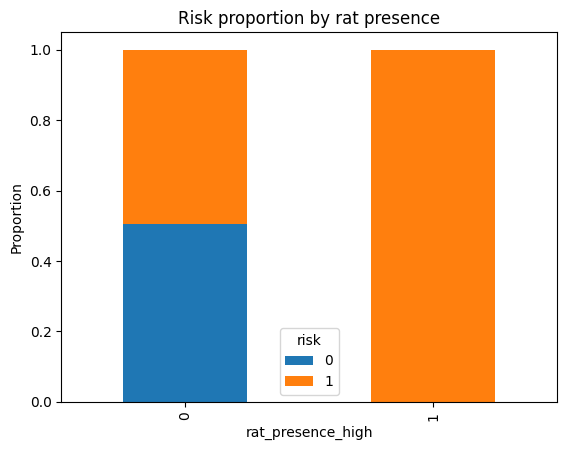

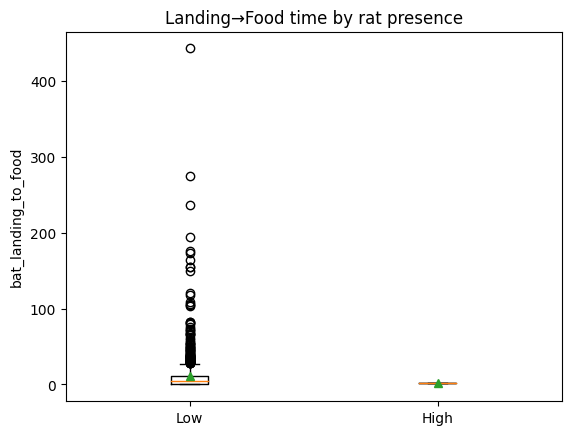

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df1 = pd.read_csv("dataset1_mapped.csv")
df2 = pd.read_csv("dataset2.csv")

df1["start_time"] = pd.to_datetime(df1["start_time"], errors="coerce", dayfirst=True)
df2["time"] = pd.to_datetime(df2["time"], errors="coerce", dayfirst=True)

df1["bin_30m"] = df1["start_time"].dt.floor("30T")
df = df1.merge(df2[["time","rat_minutes"]], left_on="bin_30m", right_on="time", how="left")

q = df["rat_minutes"].quantile(0.75)
df["rat_presence_high"] = (df["rat_minutes"] > q).astype(int)

print(df.groupby("rat_presence_high")["bat_landing_to_food"].agg(["mean","median","count"]))

g_low = df.loc[df["rat_presence_high"]==0, "bat_landing_to_food"].dropna()
g_high = df.loc[df["rat_presence_high"]==1, "bat_landing_to_food"].dropna()
if len(g_low)>1 and len(g_high)>1:
    t, p_two = stats.ttest_ind(g_high, g_low, equal_var=False, nan_policy="omit")
    print("t-test two-tailed p:", round(p_two, 4))
else:
    print("t-test skipped")

if "risk" in df.columns:
    ct = pd.crosstab(df["rat_presence_high"], df["risk"])
    from scipy.stats import chi2_contingency
    chi2, p_chi, dof, exp = chi2_contingency(ct)
    print("chi-square p:", round(p_chi, 4))
    print(ct)

    ct.div(ct.sum(1),0).plot(kind="bar", stacked=True)
    plt.title("Risk proportion by rat presence")
    plt.ylabel("Proportion")
    plt.show()

plt.boxplot([g_low.values, g_high.values], labels=["Low","High"], showmeans=True)
plt.title("Landing→Food time by rat presence")
plt.ylabel("bat_landing_to_food")
plt.show()

In [2]:
import inspect
_dntk.DeepnoteChart(df, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}""", **({'attach_selection': True} if 'attach_selection' in inspect.signature(_dntk.DeepnoteChart).parameters else {}), **({'filters': '[]'} if 'filters' in inspect.signature(_dntk.DeepnoteChart).parameters else {}))

In [3]:
import inspect
_dntk.DeepnoteChart(df, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}""", **({'attach_selection': True} if 'attach_selection' in inspect.signature(_dntk.DeepnoteChart).parameters else {}), **({'filters': '[]'} if 'filters' in inspect.signature(_dntk.DeepnoteChart).parameters else {}))

In [4]:
import inspect
_dntk.DeepnoteChart(df, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}""", **({'attach_selection': True} if 'attach_selection' in inspect.signature(_dntk.DeepnoteChart).parameters else {}), **({'filters': '[]'} if 'filters' in inspect.signature(_dntk.DeepnoteChart).parameters else {}))

In [5]:
import inspect
_dntk.DeepnoteChart(df, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}""", **({'attach_selection': True} if 'attach_selection' in inspect.signature(_dntk.DeepnoteChart).parameters else {}), **({'filters': '[]'} if 'filters' in inspect.signature(_dntk.DeepnoteChart).parameters else {}))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74c414ef-560d-420d-b4af-809d2b670979' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>